In [4]:
# notebook last tested with abtem version 1.0.0beta7

from abtem import __version__
print('current version:', __version__)

from abtem import *
from abtem.plot import show_atoms
from ase.io import read

current version: 1.0.0beta7


# Basic HRTEM simulation

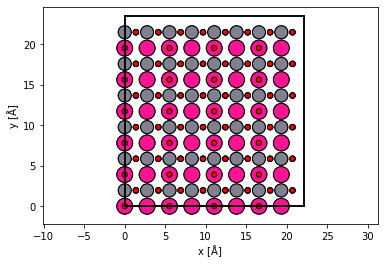

In [15]:
atoms = read('data/srtio3_110.cif')

atoms *= (1,1,1)

show_atoms(atoms)

In [36]:
sigmas = {'Sr':.1, 'Ti':.1, 'O':.1} # standard deviations of thermal vibrations

frozen_phonons = FrozenPhonons(atoms, num_configs=32, sigmas=sigmas)

potential = Potential(frozen_phonons, sampling=.08, slice_thickness=2, parametrization='kirkland', projection='finite')

In [37]:
wave = PlaneWave(
    energy=300e3 # acceleration voltage in eV
)

exit_wave = wave.multislice(potential)

In [38]:
exit_wave.array.shape

(32, 277, 293)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x16bcead46a0>)

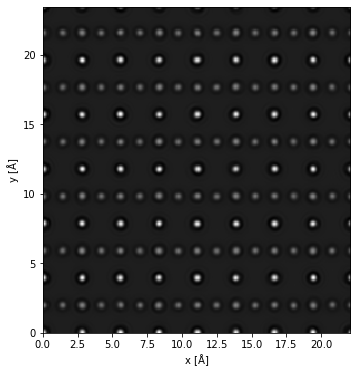

In [39]:
exit_wave.intensity().mean(0).show(figsize=(6,6))

<AxesSubplot:xlabel='alpha [mrad]', ylabel='Envelope'>

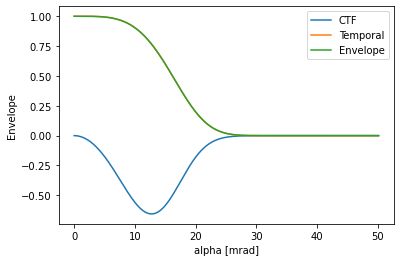

In [40]:
# See https://abtem.readthedocs.io/en/latest/walkthrough/05_contrast_transfer_function.html for parameter names

ctf = CTF(
    energy = wave.energy,
    semiangle_cutoff = 4500, # mrad
    focal_spread = 40, # Å
    defocus = -45.46, # Å
    Cs = -7e-6 * 1e10, # Å
)

ctf.show(50)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x16bce46bd90>)

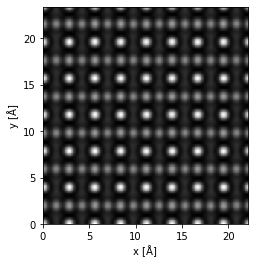

In [41]:
image_wave = exit_wave.apply_ctf(ctf)

image_wave.intensity().mean(0).show()

In [42]:
# get image intensity as array

image_wave.intensity().array[0]

array([[1.6893483, 1.6187851, 1.5138121, ..., 1.6228428, 1.6920989,
        1.7152097],
       [1.6860808, 1.6153692, 1.5103716, ..., 1.6205208, 1.6894053,
        1.7121923],
       [1.6363925, 1.5690974, 1.4693974, ..., 1.575137 , 1.640163 ,
        1.6614532],
       ...,
       [1.4510088, 1.399571 , 1.3227847, ..., 1.4004823, 1.4520149,
        1.4695374],
       [1.5625811, 1.5023822, 1.4125733, ..., 1.5041847, 1.5640982,
        1.5843678],
       [1.6459758, 1.5790987, 1.4794477, ..., 1.5819912, 1.6480982,
        1.6703228]], dtype=float32)

(<AxesSubplot:xlabel='alpha_x [mrad]', ylabel='alpha_y [mrad]'>,
 <matplotlib.image.AxesImage at 0x16bceb02f70>)

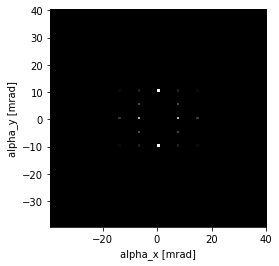

In [43]:
image_wave.diffraction_pattern(max_angle=40, block_zeroth_order=True).show()